# Rail data analysis

### Import required libraries

In [1]:
import pandas as pd
import os
import psycopg2

### Define a function to test database connectivity against a PostgreSQL database in AWS.

In [2]:
def connect():
    """ Test Connection to the PostgreSQL database server """
    conn = None
    try:     
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")
        
        # create a cursor
        cur = conn.cursor()
        
# execute a statement
        print('PostgreSQL database version:')
        cur.execute('SELECT version()')

# display the PostgreSQL database server version
        db_version = cur.fetchone()
        print(db_version)
# close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')
connect()

PostgreSQL database version:
('PostgreSQL 15.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-12), 64-bit',)
Database connection closed.


### Define a function to pull our data from PostgreSQL
**Future optimizations***

- If we want to filter on a particular update_origin, we can incorporate that in the select statement against the database.

In [3]:
def read_PGSQL():
    """ Get data from our PostgreSQL database server """
    conn = None
    try:     
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")
              
#  query the database directly using pandas...
        df = pd.read_sql("SELECT * from darwin;", conn)
        
# close the communication with the PostgreSQL
        conn.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')

    return df

In [4]:
### 

In [5]:
# def read_parquet():
#     # Get the current working directory
#     current_dir = os.getcwd()
#     # Construct the local file path
#     csv_file_path = os.path.join(current_dir, 'Raildata-psqlcsv.csv')
#     print (csv_file_path)
#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(csv_file_path)

#     # Display the DataFrame
#     return df

In [6]:
##########################################################################################
#  If reading from parquet get the datatframe kikle this
# df = read_parquet()

##########################################################################################
#  If reading from the the database do this...
df = read_PGSQL()

##########################################################################################
#  Show the result
df

C:\Users\j\AppData\Local\Temp\ipykernel_9812\1857211859.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * from darwin;", conn)


Database connection closed.


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308167142004,G42004,2023-08-16,TD,WELLING,None,21:20:30,21:21:00,21:21:00,21:21:00,...,1,NaN,None,None,None,None,False,False,None,None
1,202308168044880,P44880,2023-08-16,None,MANORS,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,2.0,None,None,None,None,False,False,None,None
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
3,202308167623593,L23593,2023-08-16,TD,CLPHMJM,None,21:20:00,21:21:00,21:20:00,21:21:00,...,11,NaN,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30031,202308218726535,W26535,2023-08-21,TD,NWPTRTG,None,19:29:30,19:31:30,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
30032,202308218726535,W26535,2023-08-21,TD,CRDFCEN,None,19:44:00,19:47:00,19:45:00,19:47:00,...,3,NaN,None,None,None,None,False,False,None,None
30033,202308217635456,L35456,2023-08-21,TD,LVRPSPY,None,17:11:00,17:11:30,17:11:00,17:11:00,...,5,NaN,None,None,None,None,False,False,None,None
30034,202308218933367,Y33367,2023-08-21,Darwin,EDINPRK,None,17:11:00,17:11:30,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None


In [7]:
df.dtypes

route_id                   object
unique_id                  object
service_start_date         object
update_origin              object
train_platform             object
working_time_pass          object
working_time_arrival       object
working_time_departure     object
planned_time_arrival       object
planned_time_departure     object
actual_arrival_time        object
actual_departure_time      object
platform                   object
train_length              float64
estimated_time             object
source                     object
actual_time                object
actual_time_class          object
is_delayed_arrival           bool
is_delayed_departure         bool
source_instance            object
estimated_time_minutes     object
dtype: object

# Updates on platform by update origin

In [8]:
# Group by 'update_origin' and count occurrences
new_df = df.copy()  # Make sure to copy the DataFrame to avoid modifying the original data
result = new_df.groupby('update_origin').size().reset_index(name='Record Count')

# Rename columns and set index to start from one
result.index = result.index + 1
result = result.rename(columns={'update_origin': 'Data Source'})

# Display the modified result
result


,Data Source,Record Count
1,CIS,5197
2,Darwin,8941
3,TD,12674
4,Trust,2583
5,Tyrell,123
6,Workstation,29


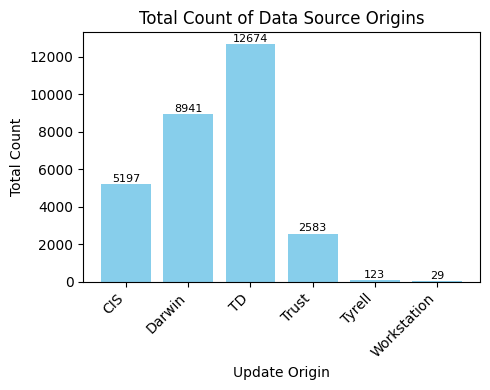

In [9]:
import matplotlib.pyplot as plt

# Group by 'update_origin' and count occurrences
result = df.groupby('update_origin').size().reset_index(name='total_count')

# Plot the data using a bar chart
plt.figure(figsize=(5, 4))  # Adjust the figsize here for a smaller graph
plt.bar(result['update_origin'], result['total_count'], color='skyblue')
plt.xlabel('Update Origin')
plt.ylabel('Total Count')
plt.title('Total Count of Data Source Origins')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, count in enumerate(result['total_count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Show the plot
plt.show()


##### It seems Darwin source system provides most of the rail information.

In [10]:
df.dtypes

route_id                   object
unique_id                  object
service_start_date         object
update_origin              object
train_platform             object
working_time_pass          object
working_time_arrival       object
working_time_departure     object
planned_time_arrival       object
planned_time_departure     object
actual_arrival_time        object
actual_departure_time      object
platform                   object
train_length              float64
estimated_time             object
source                     object
actual_time                object
actual_time_class          object
is_delayed_arrival           bool
is_delayed_departure         bool
source_instance            object
estimated_time_minutes     object
dtype: object

# Source = Darwin ,Cheking  arrival dealy of top 10 stations

In [11]:
import pandas as pd



# Convert the time columns to datetime objects
New_def_arrival = df.copy()  # Create a copy to avoid modifying the original DataFrame
New_def_arrival["actual_arrival_time"] = pd.to_datetime(New_def_arrival["actual_arrival_time"])
New_def_arrival["planned_time_arrival"] = pd.to_datetime(New_def_arrival["planned_time_arrival"])

# Filter out rows where both "actual_arrival_time" and "planned_time_arrival" are not null
New_def_arrival = New_def_arrival[
    New_def_arrival["actual_arrival_time"].notnull() &
    New_def_arrival["planned_time_arrival"].notnull()
]

# Calculate the arrival delay in minutes
New_def_arrival["arrival_delay"] = (New_def_arrival["actual_arrival_time"] - New_def_arrival["planned_time_arrival"]).dt.total_seconds() / 60.0

# Select specific columns "train_platform", "actual_arrival_time", "planned_time_arrival", and "arrival_delay"
selected_columns = ["train_platform", "actual_arrival_time", "planned_time_arrival", "arrival_delay"]
Filter_def_arrival = New_def_arrival[selected_columns]

# Filter out rows where "arrival_delay" is not null and not equal to 0.0
Filter_def_arrival = Filter_def_arrival[
    (Filter_def_arrival["arrival_delay"].notnull()) &
    (Filter_def_arrival["arrival_delay"] != 0.0)
]

# Display the filtered DataFrame using pandas
print(Filter_def_arrival.head())


TypeError: <class 'datetime.time'> is not convertible to datetime

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "train_platform": ["STMRYC", "SWLY", "OTFORD", "GRATELY", "REDHILL"],
    "actual_arrival_time": [
        "2023-08-14 00:53:00",
        "2023-08-14 00:58:00",
        "2023-08-14 01:06:00",
        "2023-08-14 00:59:00",
        "2023-08-14 00:52:00"
    ],
    "planned_time_arrival": [
        "2023-08-14 00:52:00",
        "2023-08-14 00:57:00",
        "2023-08-14 01:05:00",
        "2023-08-14 00:58:00",
        "2023-08-14 00:50:00"
    ],
    "arrival_delay": [1.0, 1.0, 1.0, 1.0, 2.0]
}

# Create a DataFrame
df_plot = pd.DataFrame(data)

# Convert the time columns to datetime objects
df_plot["actual_arrival_time"] = pd.to_datetime(df_plot["actual_arrival_time"])
df_plot["planned_time_arrival"] = pd.to_datetime(df_plot["planned_time_arrival"])

# Calculate the arrival delay in minutes
df_plot["arrival_delay"] = (df_plot["actual_arrival_time"] - df_plot["planned_time_arrival"]).dt.total_seconds() / 60.0

# Plotting a bar graph of arrival_delay values by train platform
plt.figure(figsize=(5, 6))  # Adjust the figure size if needed
plt.bar(df_plot["train_platform"], df_plot["arrival_delay"], color='blue')
plt.xlabel("Train Platform")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Arrival Delay by Train Platform")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate the average arrival delay
average_arrival_delay = Filter_def_arrival["arrival_delay"].mean()

# Display the average arrival delay
print(f"Average Arrival Delay: {average_arrival_delay} minutes")

In [ ]:
import pandas as pd

# Assuming you have already loaded your DataFrame 'darwin' into 'df'

# Create a copy of the DataFrame
New_def_departure = df.copy()

# Convert the time columns to datetime objects
New_def_departure["actual_departure_time"] = pd.to_datetime(New_def_departure["actual_departure_time"])
New_def_departure["planned_time_departure"] = pd.to_datetime(New_def_departure["planned_time_departure"])

# Calculate the departure delay in minutes
New_def_departure["departure_delay"] = (New_def_departure["actual_departure_time"] - New_def_departure["planned_time_departure"]).dt.total_seconds() / 60.0

# Select specific columns "train_platform" and "departure_delay"
selected_columns = ["train_platform", "departure_delay"]
Filter_def_delay = New_def_departure[selected_columns]

# Filter out rows where "departure_delay" is not null and not equal to 0.0
Filter_def_delay = Filter_def_delay[
    (Filter_def_delay["departure_delay"].notnull()) &
    (Filter_def_delay["departure_delay"] != 0.0)
]

# Display the filtered DataFrame using pandas
print(Filter_def_delay.head(10))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "train_platform": ["STMRYC", "NANTWCH", "SWLY", "OTFORD", "BROMLYS", "BRNHRST", "ANDOVER", "RNHAME", "PURFLET", "GRAYS"],
    "departure_delay": [1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 2.0, 2.0, 1.0]
}

# Create a DataFrame
df_delay = pd.DataFrame(data)

# Sort the DataFrame by departure delay in descending order
df_delay_sorted = df_delay.sort_values(by="departure_delay", ascending=False)

# Plotting a bar graph of departure_delay values by train platform (sorted)
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.bar(df_delay_sorted["train_platform"], df_delay_sorted["departure_delay"], color='green')
plt.xlabel("Train Platform")
plt.ylabel("Departure Delay (minutes)")
plt.title("Departure Delay by Train Platform (Descending Order)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "train_platform": ["STMRYC", "NANTWCH", "SWLY", "OTFORD", "BROMLYS", "BRNHRST", "ANDOVER", "RNHAME", "PURFLET", "GRAYS"],
    "departure_delay": [1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 2.0, 2.0, 1.0]
}

# Create a DataFrame
df_delay = pd.DataFrame(data)

# Sort the DataFrame by departure delay in descending order
df_delay_sorted = df_delay.sort_values(by="departure_delay", ascending=False)

# Plotting a bar graph of departure_delay values by train platform (sorted)
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
plt.bar(df_delay_sorted["train_platform"], df_delay_sorted["departure_delay"], color='green')
plt.xlabel("Train Platform")
plt.ylabel("Departure Delay (minutes)")
plt.title("Departure Delay by Train Platform (Descending Order)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate the average arrival delay
average_departure_delay = Filter_def_delay["departure_delay"].mean()

# Display the average arrival delay
print(f"Average Departure Delay: {average_departure_delay} minutes")


In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
average_delays = [average_arrival_delay, average_departure_delay]
delay_labels = ['Average Arrival Delay', 'Average Departure Delay']

# Create a pie chart
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
plt.pie(average_delays, labels=delay_labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribution of Average Delays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend on the right side
plt.legend(loc='upper right')

# Show the pie chart
plt.show()


In [ ]:
# It seems Darwin source system provides most of the rail information.

# Top 10 Station where trains were never dealyed
'Darwin' --distinct platform are 272

There is no arrival and departure delay for below data

In [ ]:
import pandas as pd



# Filter the DataFrame based on conditions
filtered_Arrival_df = df[
    (df['update_origin'] == 'Darwin') &
    (df['is_delayed_arrival'] == False) &
    (df['is_delayed_departure'] == False) &
    (df['train_length'].notnull())  # Filter non-null train lengths
]

# Select unique train_platform values and create a new DataFrame
unique_Arrival_train_platforms_df = filtered_Arrival_df['train_platform'].drop_duplicates().reset_index(drop=True)

# Convert the Series to a DataFrame
unique_Arrival_train_platforms_df = unique_Arrival_train_platforms_df.to_frame(name='train_platform')

# Merge the 'train_length' column from the original DataFrame 'df' based on 'train_platform'
unique_Arrival_train_platforms_df = unique_Arrival_train_platforms_df.merge(
    df[['route_id','train_platform', 'train_length']].drop_duplicates(),
    on='train_platform',
    how='left'
)

unique_Arrival_train_platforms_df.reset_index(drop=True, inplace=True)
unique_Arrival_train_platforms_df.index += 1  # Shift the index by 1

# Sort the DataFrame by 'train_length' in ascending order
non_null_records = unique_Arrival_train_platforms_df[unique_Arrival_train_platforms_df['train_length'].notnull()]
non_null_records = non_null_records.sort_values(by='train_length')

# Display the sorted records
print("Records ordered by train length (ascending):")
print('----------------------------------------------')
print(non_null_records.head(10))

In [ ]:

# Reset index starting from 1
unique_Arrival_train_platforms_df.reset_index(drop=True, inplace=True)
unique_Arrival_train_platforms_df.index += 1  # Shift the index by 1

# Sort the DataFrame by 'train_length' in ascending order
non_null_records = unique_Arrival_train_platforms_df[unique_Arrival_train_platforms_df['train_length'].notnull()]
non_null_records = non_null_records.sort_values(by='train_length')

top_10_records = non_null_records.head(10)

# Plot a bar graph for the top 10 records
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
plt.bar(top_10_records['train_platform'], top_10_records['train_length'])
plt.xlabel('Train Platform')
plt.ylabel('Train Length')
plt.title('Top 10 Train Lengths for Different Train Platforms with No Delays')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt



# Filter the DataFrame based on conditions
filtered_df = df[
    (df['update_origin'] == 'Darwin') &
    (df['is_delayed_arrival'] == False) &
    (df['is_delayed_departure'] == False) &
    (df['train_length'].notnull())  # Filter non-null train lengths
]

# Group by train_platform, calculate mean train_length, and sort by train_length
grouped_train_platforms = filtered_df.groupby('train_platform')['train_length'].mean().reset_index()
sorted_grouped_train_platforms = grouped_train_platforms.sort_values(by='train_length', ascending=False)

# Select top 10 train platforms
top_10_train_platforms = sorted_grouped_train_platforms.head(10)
top_10_train_platforms.head(10)
# Plot a bar graph
plt.bar(top_10_train_platforms['train_platform'], top_10_train_platforms['train_length'])
plt.xlabel('Train Platform')
plt.ylabel('Average Train Length')
plt.title('Top 10 Platforms by Length with no Arrival and Departure Delay (Non-Null Train Length)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Data with arraival and departure delay

In [ ]:
df.head()

In [ ]:
import pandas as pd


# Filter the DataFrame based on conditions
filtered_Delay_df = df[
    (df['update_origin'] == 'Darwin') &
    (df['is_delayed_arrival'] == True) &
    (df['is_delayed_departure'] == True)
]

# Select unique train_platform values and create a new DataFrame
unique_Delay_train_platforms_df = filtered_Delay_df['train_platform'].drop_duplicates().reset_index(drop=True)

# Convert the Series to a DataFrame
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.to_frame(name='train_platform')

# Merge the 'train_length' column from the original DataFrame 'df' based on 'train_platform'
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.merge(
    df[['train_platform', 'train_length']].drop_duplicates(),
    on='train_platform',
    how='left'
)

# Drop duplicate rows based on the 'train_platform' column
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.drop_duplicates(subset=['train_platform'])

# Filter records with non-null train_length values
non_null_records = unique_Delay_train_platforms_df[unique_Delay_train_platforms_df['train_length'].notnull()]

# Sort the records by 'train_length' in descending order
non_null_records = non_null_records.sort_values(by='train_length', ascending=False)

# Select the top 10 records
top_10_records = non_null_records.iloc[:10]

# Display the top 10 records with delays and custom index
print("Table showing top 10 records with delays, ordered by train length:")
top_10_records.reset_index(drop=True, inplace=True)  # Resetting the index starting from 0
top_10_records.index += 1  # Shifting the index to start from 1
print(top_10_records)


In [ ]:
# Plot a bar graph for the top 10 records with delays
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
plt.bar(top_10_records['train_platform'], top_10_records['train_length'])
plt.xlabel('Train Platform')
plt.ylabel('Train Length')
plt.title('Top 10 Train Lengths for Delayed Train Platforms')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions with no arrival and departure delay
filtered_df_no_delay = df[
    (df['update_origin'] == 'Darwin') &
    (df['is_delayed_arrival'] == False) &
    (df['is_delayed_departure'] == False) &
    (df['train_length'].notnull())  # Filter non-null train lengths
]

# Select specific columns for the correlation matrix
selected_columns = [
    'is_delayed_arrival',
    'is_delayed_departure',
    'train_platform',
    'route_id',
    'train_length'
]
# Create a smaller heatmap using Seaborn
plt.figure(figsize=(4, 3))  # Adjust the figsize to your preferred size
correlation_matrix_no_delay = filtered_df_no_delay[selected_columns].corr()
sns.heatmap(correlation_matrix_no_delay, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Trains with No Arrival and Departure Delays')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions with no arrival and departure delay
filtered_df_no_delay = df[
    (df['update_origin'] == 'Darwin') &
    (df['is_delayed_arrival'] == True) &
    (df['is_delayed_departure'] == True) &
    (df['train_length'].notnull())  # Filter non-null train lengths
]

# Select specific columns for the correlation matrix
selected_columns = [
    'is_delayed_arrival',
    'is_delayed_departure',
    'train_platform',
    'route_id',
    'train_length'
]

# Create a smaller heatmap using Seaborn
plt.figure(figsize=(4, 3))  # Adjust the figsize to your preferred size
correlation_matrix_no_delay = filtered_df_no_delay[selected_columns].corr()
sns.heatmap(correlation_matrix_no_delay, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Trains with Arrival and Departure Delays')
plt.show()


# Clearly Lenght of the train is contributing to an average delays in the platform, we can introduce same lenght(avg lenght of 10 ) train to avoid it.

# Finding if there is any particular day of the week or month when we have max delays?


In [ ]:

df_day_month_dealy = df.copy()

# Convert the 'service_start_date' column to datetime if it's not already
df_day_month_dealy['service_start_date'] = pd.to_datetime(df_day_month_dealy['service_start_date'])

# Extract full day name and month name into separate columns
df_day_month_dealy['day_of_week_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%A')
df_day_month_dealy['month_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%B')

# Print the DataFrame with the new day and month name columns
df_day_month_dealy.head(3)


In [ ]:

# Specify the columns to keep
cols_to_keep = ['day_of_week_name', 'month_name', 'train_platform', 'service_start_date', 'is_delayed_arrival', 'is_delayed_departure']

# Keep only the specified columns
df_day_month_dealy = df_day_month_dealy[cols_to_keep]
df_day_month_dealy = df_day_month_dealy.reset_index(drop=True)
df_day_month_dealy.index += 1 
df_day_month_dealy.head(20)

In [ ]:

df_day_month_dealy = df.copy()

# Convert the 'service_start_date' column to datetime if it's not already
df_day_month_dealy['service_start_date'] = pd.to_datetime(df_day_month_dealy['service_start_date'])

# Extract full day name and month name into separate columns
df_day_month_dealy['day_of_week_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%A')
df_day_month_dealy['month_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%B')
# Specify the columns to keep
cols_to_keep = ['day_of_week_name', 'month_name', 'train_platform', 'service_start_date', 'is_delayed_arrival', 'is_delayed_departure']

# Keep only the specified columns
df_day_month_dealy = df_day_month_dealy[cols_to_keep]
df_day_month_dealy = df_day_month_dealy.reset_index(drop=True)
df_day_month_dealy.index += 1 

# Update the column names for printing
cols_to_print = ['Day', 'Month', 'Platform Name', 'Service Day', 'Arrival Delay', 'Departure Delay']

# Print the DataFrame with the updated column names for display
df_day_month_dealy.rename(columns=dict(zip(df_day_month_dealy.columns, cols_to_print))).head(10)


In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of delayed arrivals and delayed departures
delayed_counts = df_day_month_dealy.groupby(['day_of_week_name', 'month_name'])[['is_delayed_arrival', 'is_delayed_departure']].sum()

# Plot a stacked bar chart
plt.figure(figsize=(12, 6))
delayed_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('Day of Week and Month')
plt.ylabel('Count')
plt.title('Delayed Arrivals and Departures by Day and Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(['Delayed Arrival', 'Delayed Departure'])
plt.show()


# It illustrates the distribution of delayed arrivals and delayed departures across different days of the week and months. Each bar on the chart represents a combination of a day of the week and a month.
The stacked bar chart shows a higher count of delays on Wednesdays and Thursdays in the month of August. This pattern could indicate that there's something specific about those days and that particular month that leads to more delays in train arrivals and departures.To gain a deeper understanding of the reasons behind this pattern we can consider looking into factors such as: Weather Conditions,Peak Travel Season,Maintenance and Repair,Operational Challenges and External Factors.Recommendations to provide best service to customers based on the above EDA would depend on the actual factors list above.

### See if I can isolate an individual time across all data sources.